# <center>ISN1 TD4 - Conditionnelles, boucles et fonctions simples</center>

#### Compétences visées
- Savoir implémenter une boucle for et une boucle while
- Etre capable de choisir le type de boucle approprié
- Ecrire un algorithme en langage naturel à partir d'un énoncé et savoir l’implémenter
- Ecrire une fonction simple et l’appeler dans un code 

## Exercice 1 - Mais où est le lapin ? 

Codez ici votre jeu du lapin du TD3. Vérifiez qu'il fonctionne bien.

In [3]:
from math import dist
from random import randint

n = 5
lapin = (randint(0, n-1), randint(0, n-1))
lapin_trouve = False

print(f"Trouvez de lapin dans un champ de {n}x{n}")
while not lapin_trouve:
    x = int(input("X: "))
    y = int(input("Y: "))
    
    d = dist((x, y), lapin)
    if lapin == (x, y):
        print(f"Lapin trouvé ! Il était bien en {lapin}")
        lapin_trouve = True
    else:
        print(f"Vous êtes à {d} de lui")



Trouvez de lapin dans un champ de 5x5
X: 2
Y: 2
Vous êtes à 2.8284271247461903 de lui
X: 3
Y: 3
Vous êtes à 1.4142135623730951 de lui
X: 4
Y: 4
Lapin trouvé ! Il était bien en (4, 4)


## Exercice 2 - Nombre d'Or
Comme vu dans le TD précédent, le nombre d'or $\phi$ est l'unique solution de l'équation $x^2 = x + 1$. Sa valeur exacte est $\frac{1+\sqrt 5}{2}$ soit approximativement 1.618034. Il correspond à la valeur asymptotique de la suite définie comme suit :

$$
	u_0 = 1\\
	u_{n+1} = 1+\frac{1}{u_{n}}
$$


---
### Cas 1 : le nombre d'itérations est connu

#### Q1. Dans la cellule ci-dessous, écrire votre code issu du TD précédent (Q5.1) pour calculer les `nb_iter` premiers termes de la suite ci-dessus afin d'approximer la valeur de $\phi$. Vérifiez qu'il fonctionne.

In [7]:
def u(nb_iter):
    res = 1
    for i in range(nb_iter):
        res = 1 + 1/res
    return res

print(u(1000))

1.618033988749895


### Q2. Ecrivez une fonction `affiche_convergence_nb_or` qui prend en paramètre les listes `liste_n` des valeurs de n et `liste_un` des valeurs de un et affiche la courbe d'évolution de $un$.

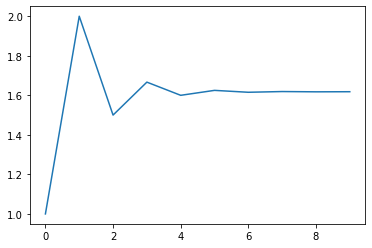

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def courbe(f, nb_iter_max):
    plt.plot([x for x in range(nb_iter_max)], [f(x) for x in range(nb_iter_max)])
    plt.show()

courbe(u, 10)

### Q3. Modifiez le code de la question 1 afin d'utiliser votre fonction pour afficher la courbe d'évolution de un pour `nb_iter = 30`.

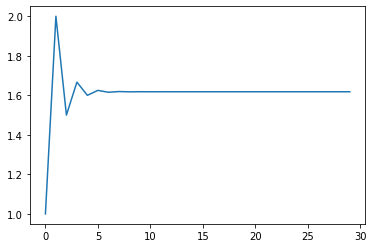

In [20]:
courbe(u, 30)

---
### Cas 2 : on s'arrête quand on est proche de $\phi$

On souhaite maintenant calculer les termes successifs de la suite jusqu’à ce que la valeur $u_n$ de la suite soit proche à une précision $\epsilon$ près de la valeur de $\phi$, c'est-à-dire que la condition suivante soit vraie  : 

$| u_n − \phi| < \epsilon$

#### Q2. Écrire un code calculant et affichant les différentes valeurs de la suite jusqu'à convergence (lorsque la condition est vraie) pour une valeur de précision donnée. Tester le code pour différentes précisions (e.g. $10^{−2}$, $10^{−6}$, ...). Plus la précision est petite, plus le résultat doit être proche de la valeur du nombre d'or.

In [28]:
phi = 1.618033988749895

def v(n):
    e = 10**-n
    res = 1
    while abs(res - phi) >= e:
        res = 1 + 1/res
    return round(res, n)

print(v(2))
print(v(6))

1.62
1.618034


---
### Cas 3 : on s'arrête quand la suite "ne bouge plus beaucoup"

On fait maintenant l’hypothèse que l’on ne connaît pas la valeur exacte de $\phi$. Par contre, une étude approfondie permettrait de montrer que la suite oscille de plus en plus près de sa valeur asymptotique $\phi$ (on dit que la suite $u_n − \phi$ est une suite alternée, convergeant asymptotiquement vers 0 et absolument strictement monotone).

La condition d'arrêt devient dans ce cas :

$|u_n - u_{n-1}| < \epsilon$

#### Q3. Proposez un code réalisant cet objectif pour différentes précisions : $10^{−2}$, $10^{−6}$, etc.

In [34]:
def w(n):
    e = 10**-n
    res = 1
    res_ = 0
    i = 0
    while abs(res - res_) >= e:
        i += 1
        res_ = res
        res = 1 + 1/res
    return i, round(res, n)

print(w(2))
print(w(6))
print(w(50))

(6, 1.62)
(16, 1.618034)
(39, 1.618033988749895)


&nbsp;
---
---
&nbsp;
## Exercice 2 - Jeu du nombre secret

Ce jeu radiophonique, célèbre dans les années 70, demandait à un maximum de 10 auditeurs au téléphone de deviner un nombre compris entre 1 et 999 de la façon suivante : le premier proposait un nombre et l’animateur répondait "plus petit" ou "plus grand" selon que le nombre proposé était plus petit ou plus grand que le nombre secret ; le second poursuivait en proposant un autre nombre, en s’aidant de la réponse faite au premier ; le jeu continuait ainsi jusqu’à ce qu’un auditeur trouve le nombre secret, et gagnait alors les 10000 Francs, ou que les 10 auditeurs aient été interrogés, auquel cas personne ne gagnait.

#### Q1. Écrire un algorithme de ce jeu en pseudo-code dans lequel le rôle de l'animateur est tenu par l'ordinateur et celui des auditeurs par l'utilisateur. Puis, faites le tester par un de vos camarades.

In [ ]:
-> choisir nombre random
répéter max 10 fois :
    -> Demander un chiffre à l'utilisateur
    Si chiffre plus grand
        -> Le chiffre est plus grand
    Si chiffre plus petit
        -> Le chiffre est plus petit
    Sinon
        -> C'est le bon chiffre
        Fin de la boucle
Si chiffre trouvé
    -> + 1000 euros
Sinon
    -> rien gagné

---
#### Q2. Implémentez votre algorithme en Python

<u>Rappel</u> : La fonction `randint` du module [random](https://docs.python.org/3/library/random.html) de la bibliothèque standard Python permet de tirer un nombre entier aléatoire compris entre 2 valeurs données. Allez vérifiez dans la documentation si les bornes sont inclues ou exclues.

In [44]:
from random import randint

num_m = randint(0, 999)
num_m_trouve = False
i = 0

while i < 10 and not num_m_trouve:
    i += 1
    num = int(input(f"{i}. Choisi un nombre entre 0 et 999 "))
    if num < num_m:
        print("Le nombre mistère est plus grand que", num)
    elif num > num_m:
        print("Le nombre mistère est plus petit que", num)
    else:
        num_m_trouve = True

if num_m_trouve:
    print("Félicitation ! Vous gagnez 1000 euros !")
else:
    print("Personne n'a trouvé... le chiffre était", num_m)

1. Choisi un nombre entre 0 et 999 500
Le nombre mistère est plus grand que 500
2. Choisi un nombre entre 0 et 999 750
Le nombre mistère est plus petit que 750
3. Choisi un nombre entre 0 et 999 625
Le nombre mistère est plus grand que 625
4. Choisi un nombre entre 0 et 999 688
Le nombre mistère est plus grand que 688
5. Choisi un nombre entre 0 et 999 719
Le nombre mistère est plus grand que 719
6. Choisi un nombre entre 0 et 999 735
Le nombre mistère est plus petit que 735
7. Choisi un nombre entre 0 et 999 727
Le nombre mistère est plus grand que 727
8. Choisi un nombre entre 0 et 999 731
Le nombre mistère est plus petit que 731
9. Choisi un nombre entre 0 et 999 729
Le nombre mistère est plus petit que 729
10. Choisi un nombre entre 0 et 999 728
Félicitation ! Vous gagnez 1000 euros !


---
Il est possible de trouver automatiquement la bonne valeur avec le **principe de dichotomie** : à chaque itération, on coupe l’intervalle en 2 intervalles de tailles égales et on regarde dans quel intervalle se trouve le nombre recherché (en le comparant avec la valeur du milieu), si on n'a pas trouvé la valeur, on fait une nouvelle itération dans lequel le nouvel intervalle est donc la moitié du précédent.

#### Q3. Écrivez maintenant le jeu inverse : Écrivez un algorithme en pseudo-code où un humain choisi une valeur entre 1 et 999, puis l'ordinateur cherche la valeur cachée en utilisant le principe de dichotomie. Affichez à la fin le nombre d'itérations nécessaires pour trouver le nombre secret.

In [ ]:
-> Demander un nombre mistère
répéter max 10 fois :
    -> tester n pour (n_max + n_min) / 2
    Si chiffre plus grand
        -> n_min = n
    Si chiffre plus petit
        -> n_max = n
    Sinon
        -> C'est le bon chiffre
        Fin de la boucle
Si chiffre trouvé
    -> + 1000 euros
Sinon
    -> rien gagné

---
#### Q4. Implémentez votre algorithme et vérifiez qu'il fonctionne correctement

In [45]:
num_m = int(input(f"Choisi nombre mistère entre 0 et 1000 : "))
num_m_trouve = False
i = 0

num_min = 0
num_max = 1000

while i < 10 and not num_m_trouve:
    i += 1
    num = round((num_max + num_min) / 2)
    if num < num_m:
        print(f"{i}. Le nombre mistère est plus grand que", num)
        num_min = num
    elif num > num_m:
        print(f"{i}. Le nombre mistère est plus petit que", num)
        num_max = num
    else:
        num_m_trouve = True

if num_m_trouve:
    print("Félicitation ! Vous gagnez 1000 euros ! Le nombre était bien", num_m)
else:
    print("Personne n'a trouvé... le nombre était", num_m)

Choisi nombre mistère entre 0 et 1000 : 33
1. Le nombre mistère est plus petit que 500
2. Le nombre mistère est plus petit que 250
3. Le nombre mistère est plus petit que 125
4. Le nombre mistère est plus petit que 62
5. Le nombre mistère est plus grand que 31
6. Le nombre mistère est plus petit que 46
7. Le nombre mistère est plus petit que 38
8. Le nombre mistère est plus petit que 34
9. Le nombre mistère est plus grand que 32
Félicitation ! Vous gagnez 1000 euros ! Le nombre était bien 33


&nbsp;
---
---

# Devoirs pour la prochaine séance
### Faire l'exercice 1 du TD5 sur papier

&nbsp;
---
---
# Pour s'entrainer

## Exercice A - Suite de Syracuse

On considère la **suite de Syracuse**, définie par la relation de récurrence suivante :

\begin{equation*}
u_{n+1} = \left\{ \begin{array}{ll}
\frac{u_n}{2}, & (\text{si $u_n$ est pair}) \\
3 u_{n} +1, & (\text{si $u_n$ est impair})
\end{array} \right.
\end{equation*}

Il a été trouvé expérimentalement (mais jamais démontré) que, pour $n$ suffisamment grand, $u_n$ oscille entre les valeurs 1, 4 et 2. Cette propriété semble vraie pour tout entier strictement positif $u_0$ (on dit que le bassin d’attraction de l’orbite périodique $1 \rightarrow 4 \rightarrow 2$ est $\mathbb N^\star$).

#### Q1. Proposez la fonction `syracuse_suiv` qui permet de calculer $u_{n+1}$ à partir de $u_n$.

In [46]:
def syracuse_suiv(u):
    if u % 2 == 0:
        return u / 2
    return 3 * u + 1

#### Q2. Proposez un code qui calcule et affiche les `nb_iter` premiers termes de la suite de Syracuse. On posera $u_0 = 50$. Vous testerez le programme pour différentes valeurs de `nb_iter`.

In [48]:
def syracuse(nb_iter):
    u = 50
    for i in range(nb_iter):
        u = syracuse_suiv(u)
    return u

print(syracuse(1))
print(syracuse(2))
print(syracuse(3))
print(syracuse(4))

25.0
76.0
38.0
19.0


### Q3. Modifiez votre code précédent afin d'afficher l'évolution de la suite de Syracuse en fonction des itérations. Vous devez observer l'oscillation entre les trois valeurs 1, 4, 2.

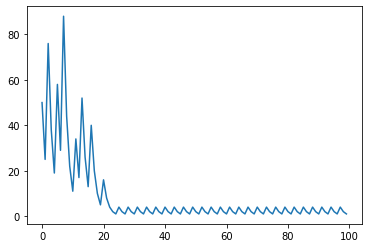

In [52]:
courbe(syracuse, 100)

#### Q3. Proposez un code qui calcule et affiche les termes de la suite de Syracuse jusqu'à obtenir 1. On posera encore $u_0 = 50$.

In [54]:
n = 0
res = 50
print("u0 = 50")

while res != 1:
    n += 1
    res = syracuse_suiv(res)
    print(f"u{n} = {res}")

u0 = 50
u1 = 25.0
u2 = 76.0
u3 = 38.0
u4 = 19.0
u5 = 58.0
u6 = 29.0
u7 = 88.0
u8 = 44.0
u9 = 22.0
u10 = 11.0
u11 = 34.0
u12 = 17.0
u13 = 52.0
u14 = 26.0
u15 = 13.0
u16 = 40.0
u17 = 20.0
u18 = 10.0
u19 = 5.0
u20 = 16.0
u21 = 8.0
u22 = 4.0
u23 = 2.0
u24 = 1.0
